In [5]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

fruits = pd.read_table('C:\\Users\\dmehri\\Documents\\DATA\\Applied Data Science Coursera\\Course 3\\fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

#2D example
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']


clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y, cv = 3)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))


print ()
cv_scores = cross_val_score(clf, X, y, cv = 5)
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

('Cross-validation scores (3-fold):', array([ 0.77272727,  0.73684211,  0.83333333]))
Mean cross-validation score (3-fold): 0.781
()
('Cross-validation scores (5-fold):', array([ 0.84615385,  0.75      ,  0.83333333,  0.83333333,  0.8       ]))
Mean cross-validation score (5-fold): 0.813


### Validation curve example

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [7]:
print(train_scores)

[[ 0.48648649  0.425       0.41463415]
 [ 0.83783784  0.725       0.75609756]
 [ 0.91891892  0.9         0.92682927]
 [ 1.          1.          0.97560976]]


In [8]:
print(test_scores)

[[ 0.45454545  0.31578947  0.33333333]
 [ 0.81818182  0.68421053  0.61111111]
 [ 0.40909091  0.84210526  0.66666667]
 [ 0.36363636  0.21052632  0.38888889]]


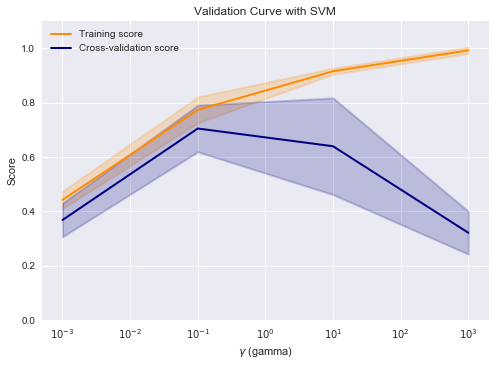

In [9]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()